In [4]:
import cv2
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


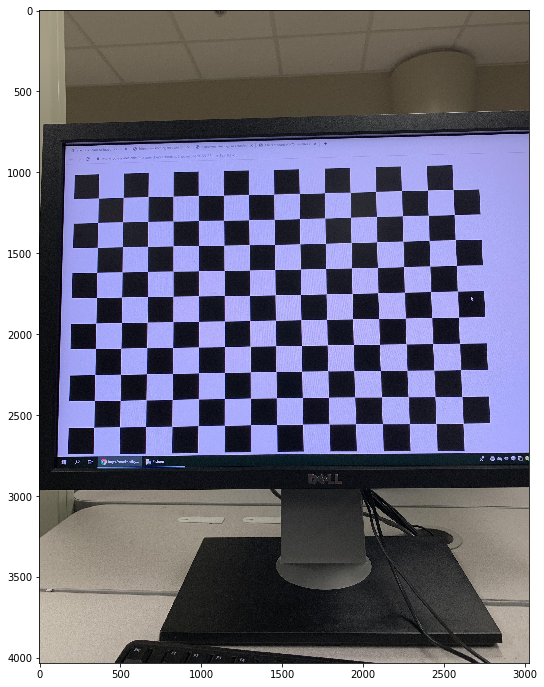

In [26]:
img = cv2.imread('checker board.jpg')

fig = figure(0, (18,12))
imshow(img[:,:,(2,1,0)])

In [27]:
img.shape

(4032, 3024, 3)

In [28]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Find the chess board corners
ret, corners = cv2.findChessboardCorners(image = gray, patternSize = (15,10), corners = None)

In [29]:
gray.shape

(4032, 3024)

In [30]:
ret

True

In [31]:
corners.shape

(150, 1, 2)

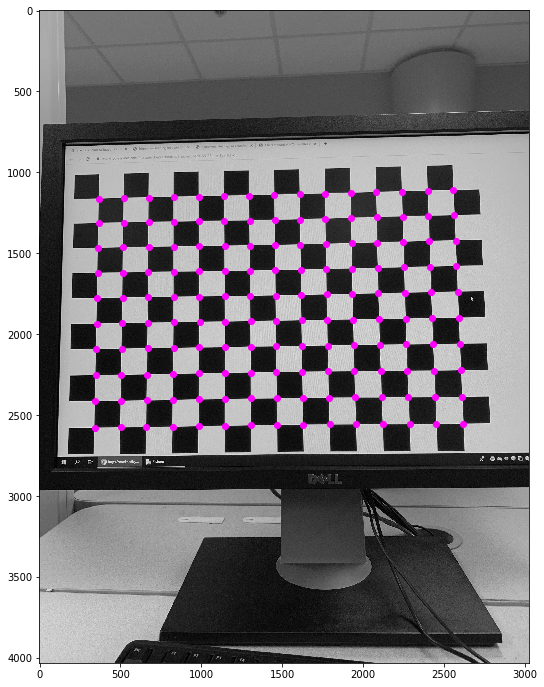

In [32]:
fig = figure(0, (12,12))
imshow(gray, cmap = 'gray')
scatter(corners[:,0,0], corners[:,0,1], color = (1, 0, 1))

In [33]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# These object points or "world coordinates" are in the coordinate frame of 
# the chessboard, so they won't change image to image. 
objp = np.zeros((15*10,3), np.float32)
objp[:,:2] = np.mgrid[0:15,0:10].T.reshape(-1,2)
   
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Save images for visualization:
images = []
images_fail = []

In [34]:
#img = cv2.imread()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Find the chess board corners
ret, corners = cv2.findChessboardCorners(image = gray, patternSize = (15,10), corners = None)

if ret:
    objpoints.append(objp)
    cv2.cornerSubPix(gray, corners, (11,11), (-1,-1),criteria)
    imgpoints.append(corners)   

    #For visualization
    images.append(gray)

else:
    images_fail.append(gray)

In [35]:
ret, intrinsicP, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, 
                                                          imgpoints, 
                                                          gray.shape[::-1],
                                                          None,
                                                          None)

In [36]:
#Intrinsic Matrix
intrinsicP

array([[3.01616413e+03, 0.00000000e+00, 1.53488919e+03],
       [0.00000000e+00, 3.02014857e+03, 1.97552872e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [37]:
#Distortion Coeffcients!
dist

array([[ 2.40720524e-01, -1.17325350e+00,  2.73445363e-04,
        -3.12879106e-05,  1.80624620e+00]])